## Observations and Insights 

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_path)
results_df = pd.read_csv(study_results_path)

In [97]:
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [98]:
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [99]:
# Combine the data into a single dataset
combined_df = pd.merge(results_df, mouse_df, how="left", on="Mouse ID")
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [100]:
# Checking the number of mice in the DataFrame.
len(combined_df['Mouse ID'])

1893

In [101]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_df = combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]
dup_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [102]:
# Optional: Get all the data for the duplicate mouse ID. 


In [103]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dedup_df = combined_df.drop_duplicates(["Mouse ID", "Timepoint"])
dedup_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [104]:
# Checking the number of mice in the clean DataFrame.
dedup_df['Mouse ID'].nunique()

249

## Summary Statistics

In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
avg = dedup_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = dedup_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = dedup_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_dev = dedup_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = dedup_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [106]:
stats_table = pd.DataFrame({"Mean Tumor Volume" : avg,
                          "Median Tumor Volume" : median,
                          "Variance Tumor Volume" : variance,
                          "Std_Dev Tumor Volume" : std_dev,
                          "SEM Tumor Volume" : median,})
stats_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std_Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,41.557809
Ceftamin,52.591172,51.776157,39.290177,6.268188,51.776157
Infubinol,52.884795,51.820584,43.128684,6.567243,51.820584
Ketapril,55.235638,53.698743,68.553577,8.279709,53.698743
Naftisol,54.331565,52.509285,66.173479,8.134708,52.509285
Placebo,54.033581,52.288934,61.168083,7.821003,52.288934
Propriva,52.393463,50.909965,43.138803,6.568014,50.909965
Ramicane,40.216745,40.673236,23.486704,4.846308,40.673236
Stelasyn,54.233149,52.431737,59.450562,7.710419,52.431737


In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats_table = dedup_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
stats_table
# This method produces everything in a single groupby function.
## MUST USE PANDAS STAT SYNTAX

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

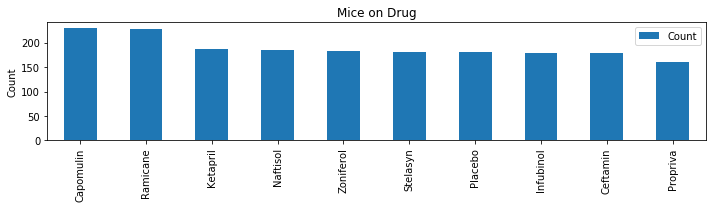

In [108]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
counts = combined_df['Drug Regimen'].value_counts()
bar_df = pd.DataFrame({"Count" : counts})                 
bar_df.reset_index()
bar_df.plot(kind="bar", figsize=(10,3))
plt.title('Mice on Drug')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


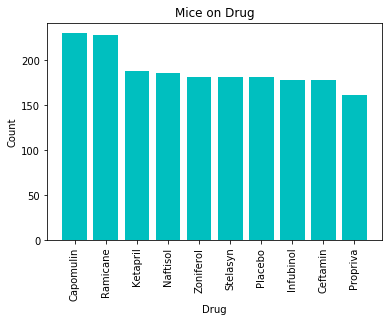

In [109]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
counts = combined_df['Drug Regimen'].value_counts()
drugs = counts.index.values
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Drug')
plt.title('Mice on Drug')
plt.bar(drugs,counts, color = "c", align="center")
plt.show()

In [110]:
drugs

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

## Pie Plots

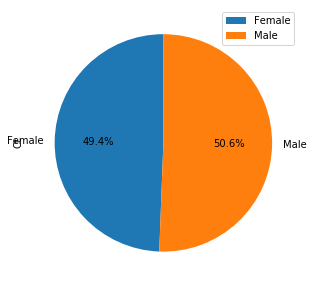

In [111]:
mice_sex = combined_df.groupby(['Sex']).count()['Mouse ID']
pie_df = pd.DataFrame({'Ct' : mice_sex})
pie_df.reset_index()
pie_df.plot(kind="pie", y='Ct', figsize=(5,5),autopct="%1.1f%%",startangle=90)
plt.show()

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pyplots
mice_sex = combined_df.groupby(['Sex']).count()['Mouse ID']
mice_sex

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

In [113]:
mice_sex.values

array([935, 958], dtype=int64)

In [114]:
mice_sex.index.values

array(['Female', 'Male'], dtype=object)

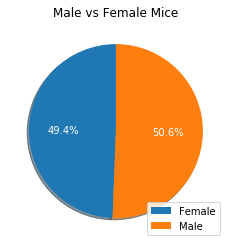

In [115]:
plt.pie(mice_sex, autopct="%1.1f%%", shadow=True, startangle=90, textprops={'color':'w'})
plt.title('Male vs Female Mice')
plt.legend(mice_sex.index.values,loc=4)
plt.show()

## Quartiles, Outliers and Boxplots

In [116]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
avg_tumor = dedup_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'].sort_values()
avg_tumor.head()

Drug Regimen
Ramicane     40.216745
Capomulin    40.675741
Propriva     52.393463
Ceftamin     52.591172
Infubinol    52.884795
Name: Tumor Volume (mm3), dtype: float64

In [117]:
promising_df = dedup_df.loc[(dedup_df['Drug Regimen']=='Ramicane') | (dedup_df['Drug Regimen']=='Compomulin') | 
                          (dedup_df['Drug Regimen']=='Propriva') | (dedup_df['Drug Regimen']=='Ceftamin') |
                          (dedup_df['Drug Regimen']=='Infubinol'), :]

promising_df = promising_df.sort_values('Timepoint', ascending = False)
promising_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1786,a251,45,65.525743,1,Infubinol,Female,21,25
1810,l471,45,67.748662,1,Ceftamin,Female,7,28
1808,m546,45,30.564625,1,Ramicane,Male,18,16
1806,f345,45,60.918767,1,Infubinol,Male,23,26
...,...,...,...,...,...,...,...,...
195,k210,0,45.000000,0,Ceftamin,Male,15,28
196,a275,0,45.000000,0,Ceftamin,Female,20,28
197,x581,0,45.000000,0,Ceftamin,Female,19,28
198,n482,0,45.000000,0,Propriva,Female,4,29


In [118]:
quartiles = promising_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {:.2f}".format(a{lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

SyntaxError: invalid syntax (<ipython-input-118-17bd00d55251>, line 13)

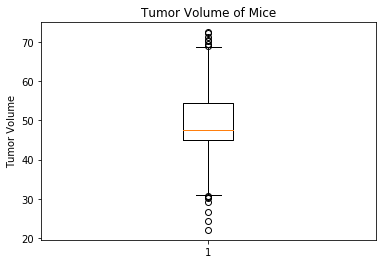

In [119]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_Volume = promising_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

## Line and Scatter Plots

In [123]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = combined_df.loc[combined_df['Drug Regimen']=='Capomulin',:]

Capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


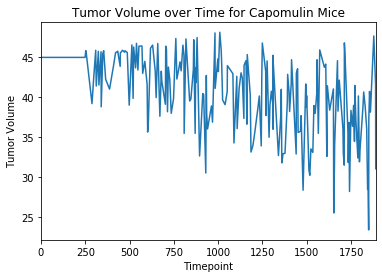

In [124]:
timepoint = Capomulin_df['Timepoint']
volume = Capomulin_df['Tumor Volume (mm3)']

volume.plot.line(timepoint, volume)

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.show()

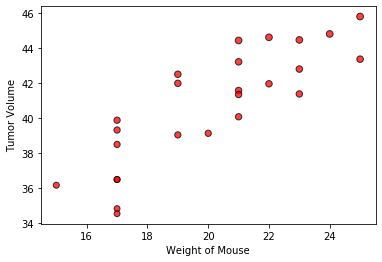

In [125]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight, tumor_volume, marker="o", facecolors="red", edgecolors="black", s=tumor_volume, alpha=0.75)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()


## Correlation and Regression

In [128]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


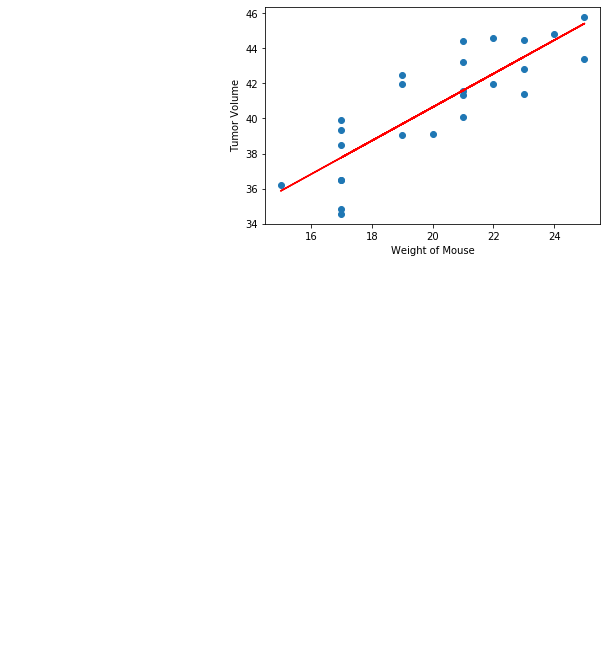

In [129]:
x_values = mouse_weight
y_values = tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()